In [1]:
import GCRCatalogs
import matplotlib.pyplot as plt
import pickle
import sys
import glob
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import sys
from astropy.table import Table
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
    from clmm.dataops import compute_galaxy_weights
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

In [2]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit

In [3]:
file = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/DC2/full_*')

In [4]:
f=edit.load_pickle(file[0])

In [5]:
f.z

0.571269690990448

In [8]:
f.galcat.colnames

['ext_shapeHSM_HsmShapeRegauss_sigma',
 'id',
 'ext_shapeHSM_HsmShapeRegauss_e2',
 'photoz_mean',
 'mag_i',
 'ext_shapeHSM_HsmShapeRegauss_resolution',
 'snr_i_cModel',
 'dec',
 'ra',
 'photoz_pdf',
 'ext_shapeHSM_HsmShapeRegauss_e1',
 'mag_i_cModel',
 'photoz_odds',
 'chi1_HSM',
 'chi2_HSM',
 'chi_HSM',
 'chi_sigma_HSM',
 'chi_HSM_resolution',
 'e1_HSM',
 'e2_HSM',
 'e_HSM',
 'e_sigma_HSM',
 'pzbins']

(array([1.772e+03, 1.744e+03, 1.801e+03, 1.825e+03, 1.873e+03, 2.050e+03,
        2.188e+03, 2.560e+03, 2.832e+03, 2.986e+03, 2.802e+03, 2.718e+03,
        2.393e+03, 2.253e+03, 1.978e+03, 1.791e+03, 1.580e+03, 1.425e+03,
        1.403e+03, 1.525e+03, 1.663e+03, 1.864e+03, 2.290e+03, 2.280e+03,
        1.853e+03, 1.443e+03, 1.229e+03, 1.046e+03, 9.950e+02, 1.012e+03,
        9.790e+02, 1.135e+03, 1.176e+03, 1.362e+03, 1.444e+03, 9.710e+02,
        7.030e+02, 5.290e+02, 3.870e+02, 3.650e+02, 3.200e+02, 3.080e+02,
        2.620e+02, 2.410e+02, 2.260e+02, 2.330e+02, 2.150e+02, 1.740e+02,
        1.690e+02, 1.660e+02, 1.680e+02, 1.380e+02, 1.320e+02, 1.430e+02,
        1.210e+02, 1.250e+02, 1.280e+02, 9.500e+01, 1.130e+02, 1.110e+02,
        1.230e+02, 1.010e+02, 9.800e+01, 7.600e+01, 5.600e+01, 4.000e+01,
        4.300e+01, 2.800e+01, 2.700e+01, 2.800e+01, 1.400e+01, 2.500e+01,
        2.100e+01, 2.000e+01, 3.000e+01, 2.600e+01, 2.300e+01, 1.800e+01,
        1.600e+01, 1.500e+01, 1.900e+0

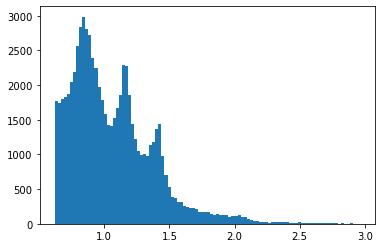

In [6]:
plt.hist(f.galcat['photoz_mean'], bins=100)

In [7]:

plt.scatter(f.galcat['photoz_mean'], 1/(f.galcat['sigmac_BPZ']**2), label = 'brut force')
plt.scatter(f.galcat['photoz_mean'], 1/(f.galcat['sigmac_BPZ_CLMM']**2), label = 'CLMM')
#plt.scatter(f.galcat['photoz_mean'], 1/f.galcat['sigmac_BPZ']**2)
#plt.scatter(f.galcat['photoz_mean'], 1./cosmo.eval_sigma_crit(f.z,np.array(f.galcat['photoz_mean'])))
plt.legend()
plt.yscale('log')
plt.xlabel('z', fontsize=20)
plt.ylabel(r'$\Sigma_c ^{-2}$', fontsize=20)

KeyError: 'sigmac_bpz'

In [ ]:
w= (1./cosmo.eval_sigma_crit(f.z,np.array(f.galcat['photoz_mean'])**2))

In [ ]:
plt.hist(w)

In [ ]:
f.galcat['photoz_mean']